**Implement a Single Layer Perceptron**


In [4]:
import numpy as np

# Define the XOR gate inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialize weights and bias
# Change the weights to have a float data type
weights = np.array([1.0, 1.0])  # Use floats to avoid type mismatch during updates
bias = 0

# Define the step activation function
def step_function(x):
  return 1 if x >= 0 else 0

# Training loop
learning_rate = 0.1
epochs = 100

for epoch in range(epochs):
  for i in range(len(X)):
    # Calculate the weighted sum
    weighted_sum = np.dot(X[i], weights) + bias

    # Apply the step function to get the predicted output
    predicted_output = step_function(weighted_sum)

    # Calculate the error
    error = y[i] - predicted_output

    # Update the weights and bias
    weights += learning_rate * error * X[i]
    bias += learning_rate * error

# Test the network
for i in range(len(X)):
  weighted_sum = np.dot(X[i], weights) + bias
  predicted_output = step_function(weighted_sum)
  print(f"Input: {X[i]}, Predicted Output: {predicted_output}, Actual Output: {y[i]}")

Input: [0 0], Predicted Output: 1, Actual Output: 0
Input: [0 1], Predicted Output: 1, Actual Output: 1
Input: [1 0], Predicted Output: 0, Actual Output: 1
Input: [1 1], Predicted Output: 0, Actual Output: 0


 **Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch
Pitts) Neuron**

In [5]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialize weights and bias
w1 = 1
w2 = 1
theta = 0  # Threshold

# Define MCP neuron activation function
def mcp_neuron(x1, x2):
  summation = w1*x1 + w2*x2
  if summation >= theta:
    return 1
  else:
    return 0

# Training the MCP neuron (this is a symbolic training, as MCP neurons don't learn weights)
# For XOR, there's no weight combination that solves the problem with a single MCP neuron

# Test the MCP neuron on XOR data
print("Testing MCP Neuron on XOR Gate:")
for i in range(len(X)):
  x1, x2 = X[i]
  prediction = mcp_neuron(x1, x2)
  print(f"Input: {X[i]}, Output: {prediction}, Expected: {y[i]}")

# We observe that the MCP neuron cannot correctly classify the XOR gate

Testing MCP Neuron on XOR Gate:
Input: [0 0], Output: 1, Expected: 0
Input: [0 1], Output: 1, Expected: 1
Input: [1 0], Output: 1, Expected: 1
Input: [1 1], Output: 1, Expected: 0


**Implement XOR using Multi-Layer Perceptron.**

In [7]:
import numpy as np

# Define XOR input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Define activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Define derivative of sigmoid
def sigmoid_derivative(x):
  return x * (1 - x)

# Initialize weights and biases
# For the first hidden layer
w1 = np.random.rand(2, 2)
b1 = np.random.rand(1, 2)
# For the output layer
w2 = np.random.rand(2, 1)
b2 = np.random.rand(1, 1)

# Learning rate
learning_rate = 0.1
epochs = 10000

# Training loop
for epoch in range(epochs):
  # Forward propagation
  hidden_layer_input = np.dot(X, w1) + b1
  hidden_layer_output = sigmoid(hidden_layer_input)
  output_layer_input = np.dot(hidden_layer_output, w2) + b2
  output_layer_output = sigmoid(output_layer_input)

  # Backpropagation
  error = y.reshape(-1, 1) - output_layer_output
  d_output = error * sigmoid_derivative(output_layer_output)
  error_hidden_layer = d_output.dot(w2.T)
  d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

  # Update weights and biases
  w2 += hidden_layer_output.T.dot(d_output) * learning_rate
  b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
  w1 += X.T.dot(d_hidden_layer) * learning_rate
  b1 += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Testing the MLP
print("Testing Multi-Layer Perceptron on XOR Gate:")
for i in range(len(X)):
  hidden_layer_input = np.dot(X[i], w1) + b1
  hidden_layer_output = sigmoid(hidden_layer_input)
  output_layer_input = np.dot(hidden_layer_output, w2) + b2
  output_layer_output = sigmoid(output_layer_input)
  print(f"Input: {X[i]}, Output: {output_layer_output[0][0]:.4f}, Expected: {y[i]}")

Testing Multi-Layer Perceptron on XOR Gate:
Input: [0 0], Output: 0.0581, Expected: 0
Input: [0 1], Output: 0.9466, Expected: 1
Input: [1 0], Output: 0.9466, Expected: 1
Input: [1 1], Output: 0.0575, Expected: 0


##**Sentiment Analysis Twitter Airline**

Training with sigmoid activation function...
Epoch 1/10
231/231 [==============================] - 2s 6ms/step - loss: 0.5309 - accuracy: 0.7686 - val_loss: 0.5246 - val_accuracy: 0.7818
Epoch 2/10
231/231 [==============================] - 1s 5ms/step - loss: 0.4776 - accuracy: 0.7951 - val_loss: 0.4712 - val_accuracy: 0.7818
Epoch 3/10
231/231 [==============================] - 1s 5ms/step - loss: 0.4124 - accuracy: 0.8184 - val_loss: 0.3691 - val_accuracy: 0.8170
Epoch 4/10
231/231 [==============================] - 1s 5ms/step - loss: 0.3196 - accuracy: 0.8697 - val_loss: 0.3012 - val_accuracy: 0.8581
Epoch 5/10
231/231 [==============================] - 1s 5ms/step - loss: 0.2639 - accuracy: 0.8932 - val_loss: 0.2855 - val_accuracy: 0.8749
Epoch 6/10
231/231 [==============================] - 1s 5ms/step - loss: 0.2345 - accuracy: 0.9025 - val_loss: 0.2544 - val_accuracy: 0.8928
Epoch 7/10
231/231 [==============================] - 1s 5ms/step - loss: 0.2105 - accuracy: 0.9151 - v

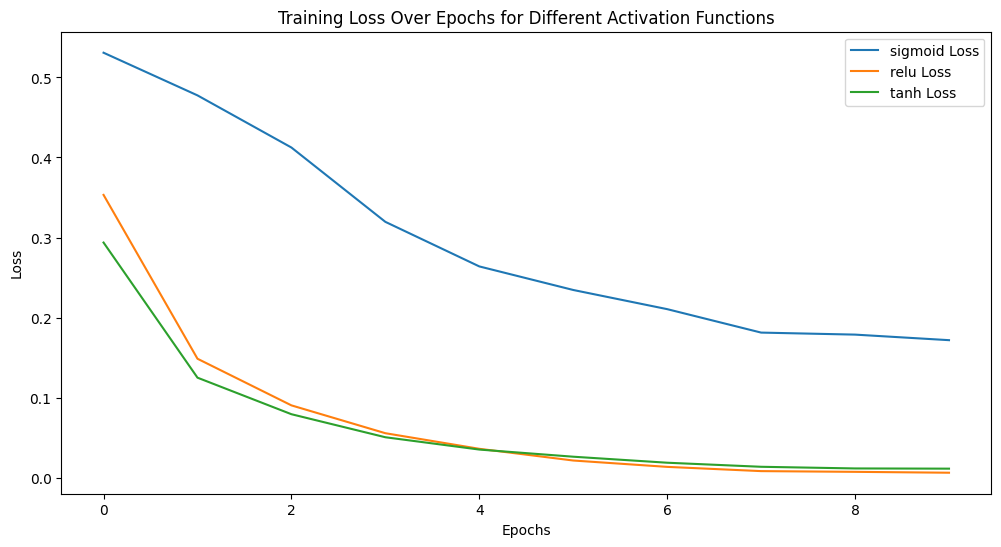

Evaluating model with sigmoid activation function...
73/73 [==============================] - 0s 2ms/step - loss: 0.1846 - accuracy: 0.9255
sigmoid Test Accuracy: 0.9255
Evaluating model with relu activation function...
73/73 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.9125
relu Test Accuracy: 0.9125
Evaluating model with tanh activation function...
73/73 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.9112
tanh Test Accuracy: 0.9112


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load and preprocess the data
df = pd.read_csv('/content/Tweets - Tweets.csv')

# Preprocessing: Keep only relevant columns
df = df[['text', 'airline_sentiment']]

# Convert sentiment into binary labels (positive = 1, negative = 0)
df['airline_sentiment'] = df['airline_sentiment'].map({'positive': 1, 'negative': 0})

# Drop any rows with missing data
df = df.dropna()

# Split the data into training and testing sets
X = df['text']
y = df['airline_sentiment']

# Convert text data into numerical form using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(X).toarray()

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
def create_model(activation_func='sigmoid'):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation=activation_func))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation=activation_func))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

# Train and evaluate the model
activation_funcs = ['sigmoid', 'relu', 'tanh']
history_dict = {}

for activation_func in activation_funcs:
    print(f"Training with {activation_func} activation function...")
    model = create_model(activation_func)
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
    history_dict[activation_func] = history

# Plot the loss over epochs
plt.figure(figsize=(12, 6))
for activation_func in activation_funcs:
    plt.plot(history_dict[activation_func].history['loss'], label=f'{activation_func} Loss')
plt.title('Training Loss Over Epochs for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate model on the test set
for activation_func in activation_funcs:
    print(f"Evaluating model with {activation_func} activation function...")
    model = create_model(activation_func)
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)  # Train again with the same parameters
    loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
    print(f'{activation_func} Test Accuracy: {accuracy:.4f}')
